# 6. Pathway Analysis, Enrichr - gget enrichr

In [7]:
import gget
import pandas as pd
import os
import shutil
import anndata as ad

number_mutant_genes = 500
databases = ['pathway', 'transcription', 'ontology', 'diseases_drugs', 'celltypes', 'kinase_interactions']

base_dir = "/home/jrich/Desktop/CART_prostate_sc"
run_id = "SAMN10988512_SRX5414523_SRR8615230"

data_folder = os.path.join(base_dir, 'data')
output_figure_dir = os.path.join(data_folder, 'output', run_id, 'figures', 'pathway')
output_base = os.path.join(data_folder, 'output', run_id, 'data')
top_mutants_path = f"{base_dir}/data/output/SAMN10988512_SRX5414523_SRR8615230/data/sorted_mutations.txt"
reference_cmc_file = f"{base_dir}/data/reference/COSMIC/GRCh37/CancerMutationCensus_AllData_Tsv_v100_GRCh37/CancerMutationCensus_AllData_v100_GRCh37.tsv"

os.makedirs(output_figure_dir, exist_ok=True)

In [8]:
enrichr_output_path = f"{output_base}/enrichr"

if not os.path.exists(enrichr_output_path):
    os.makedirs(enrichr_output_path, exist_ok=True)

In [9]:
reference_cmc_df = pd.read_csv(reference_cmc_file, sep="\t")
adata = ad.read_h5ad("FILL IN PATH") #!!!

adata.var = adata.var.sort_values(by='transcript_count', ascending=False)

/tmp/ipykernel_183692/1045869396.py:1: DtypeWarning: Columns (2,56) have mixed types. Specify dtype option on import or set low_memory=False.
  reference_cmc_df = pd.read_csv(reference_cmc_file, sep="\t")


In [10]:
top_mutant_gene_list = []

for header in adata.var['header'][:number_mutant_genes]:
    gene_name = adata.var.loc[adata.var['header'] == header, 'gene_name'].iloc[0]
    top_mutant_gene_list.append(gene_name)

background_gene_list = list(set(reference_cmc_df["GENE_NAME"].tolist()))

print(top_mutant_gene_list)

['UNC80', 'ARNTL2', 'KCNT2', 'AC068620.1', 'AC137056.1', 'TET1', 'FAM27D1', 'ZNF701', 'AC008686.1', 'AC002472.1', 'RP11-297N6.4', 'AC104472.1', 'AL590867.1', 'AC002472.1', 'VAX2', 'STAP2', 'TCF4', 'TLK1', 'AC011475.1', 'C8orf44', 'RP11-944C7.1', 'AC004017.1', 'RPL39L', 'UBE2J2', 'ZNF714', 'RP11-297N6.4', 'DISC1', 'TMEM131', 'AL162431.1', 'AC004824.2', 'PKP2', 'DISC1', 'JMJD1C', 'ISY1', 'RP11-382J12.1', 'F7', 'AC004017.1', 'H3F3C', 'ZNF701', 'MTRNR2L12', 'NANOGNB', 'AC004824.2', 'AC104472.1', 'OR1J1', 'GVQW1', 'C8orf44', 'REL', 'C8orf44', 'FAM27E3', 'RP1-241P17.4', 'BTG3', 'SLC30A6', 'ZNF714', 'NEK4', 'TUBGCP2', 'THEMIS', 'NDUFA11', 'TCF4', 'RP11-105C20.2', 'MAP4K1', 'ZNF334', 'NPIPB15', 'SUGT1', 'AC093323.1', 'FBLIM1', 'GVQW1', 'AP001024.1', 'DISC1', 'RP11-382J12.1', 'ISY1', 'AC104472.1', 'BEND2', 'TBXA2R', 'C14orf178', 'RP11-863K10.7', 'TTF1', 'NEK4', 'SLFN12L', 'RPGRIP1L', 'ZNF429', 'PRR16', 'ASCC1', 'ARHGAP29', 'RP11-1102P16.1', 'ZNF91', 'ZNF429', 'RP11-944C7.1', 'CALR', 'AC003102.1

08:31:32 - INFO - Performing Enichr analysis using database KEGG_2021_Human. 
    Please note that there might be a more appropriate database for your application. 
    Go to https://maayanlab.cloud/Enrichr/#libraries for a full list of supported databases.
    
08:31:33 - INFO - Performing Enichr analysis using user-defined background gene list.
08:31:37 - INFO - Performing Enichr analysis using database ChEA_2016. 
    Please note that there might be a more appropriate database for your application. 
    Go to https://maayanlab.cloud/Enrichr/#libraries for a full list of supported databases.
    
08:31:37 - INFO - Performing Enichr analysis using user-defined background gene list.


08:31:39 - INFO - Performing Enichr analysis using database GO_Biological_Process_2021. 
    Please note that there might be a more appropriate database for your application. 
    Go to https://maayanlab.cloud/Enrichr/#libraries for a full list of supported databases.
    
08:31:40 - INFO - Performing Enichr analysis using user-defined background gene list.
08:31:42 - INFO - Performing Enichr analysis using database GWAS_Catalog_2019. 
    Please note that there might be a more appropriate database for your application. 
    Go to https://maayanlab.cloud/Enrichr/#libraries for a full list of supported databases.
    
08:31:42 - INFO - Performing Enichr analysis using user-defined background gene list.
08:31:44 - INFO - Performing Enichr analysis using database PanglaoDB_Augmented_2021. 
    Please note that there might be a more appropriate database for your application. 
    Go to https://maayanlab.cloud/Enrichr/#libraries for a full list of supported databases.
    
08:31:44 - INFO -

Error with kinase_interactions: Expecting value: line 1 column 182 (char 181)


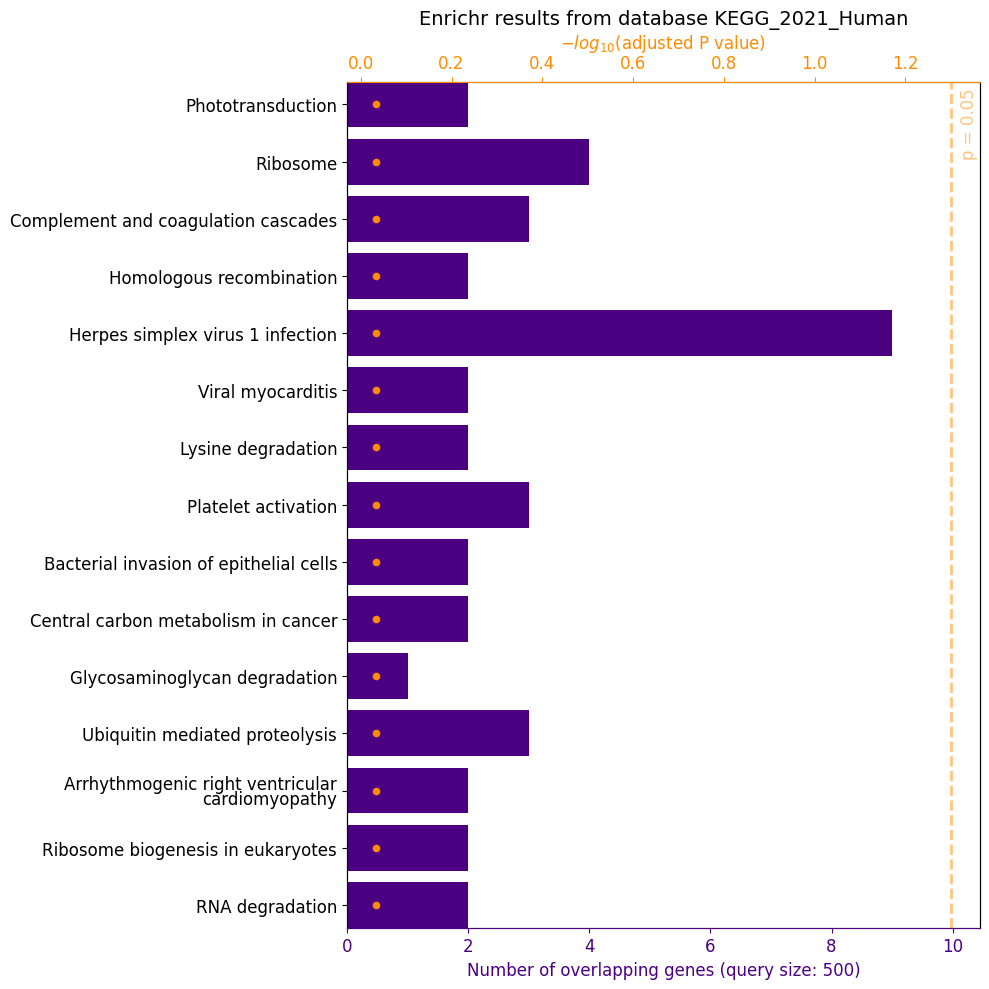

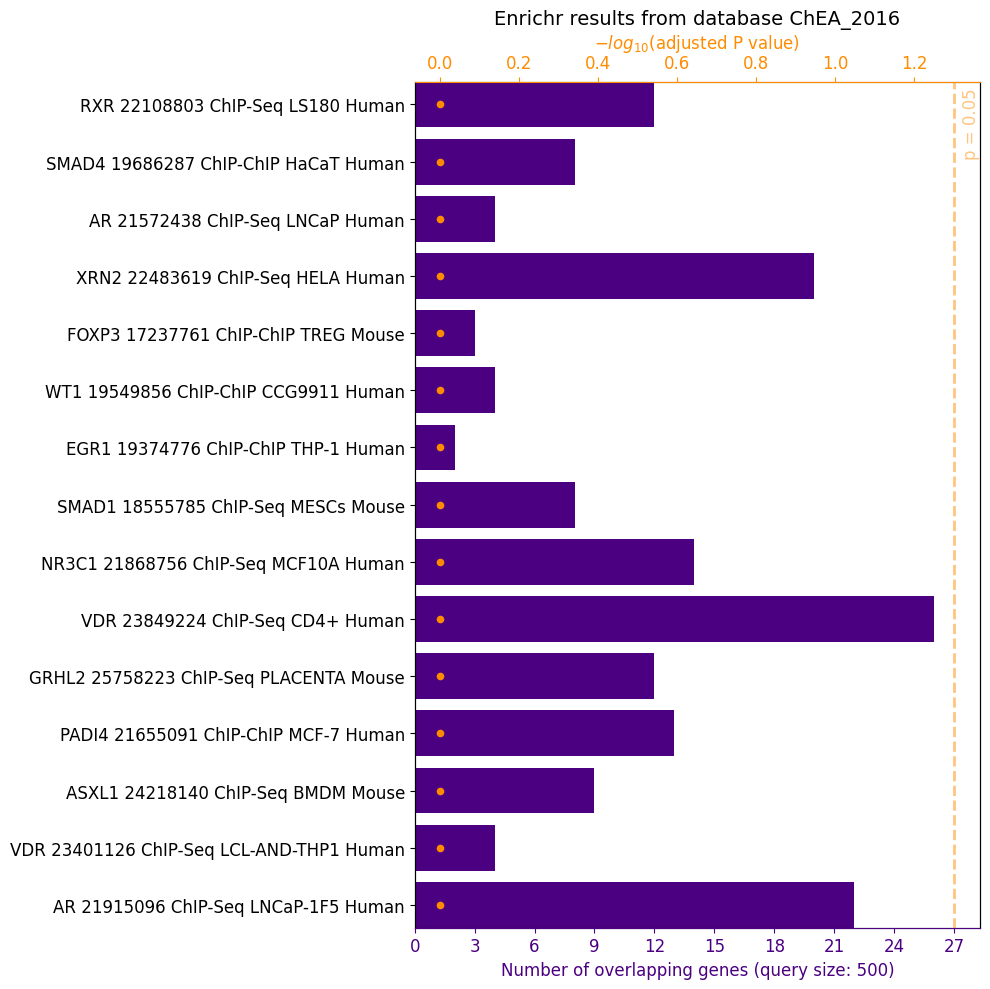

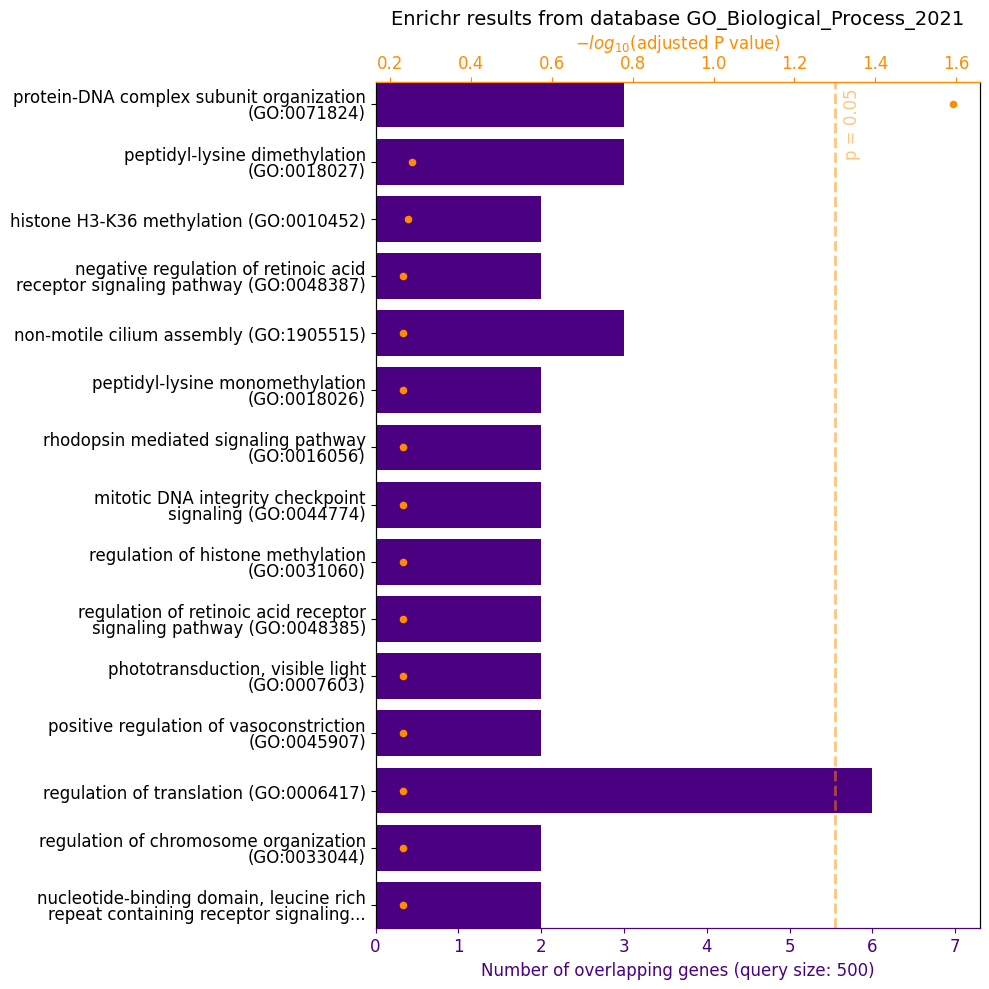

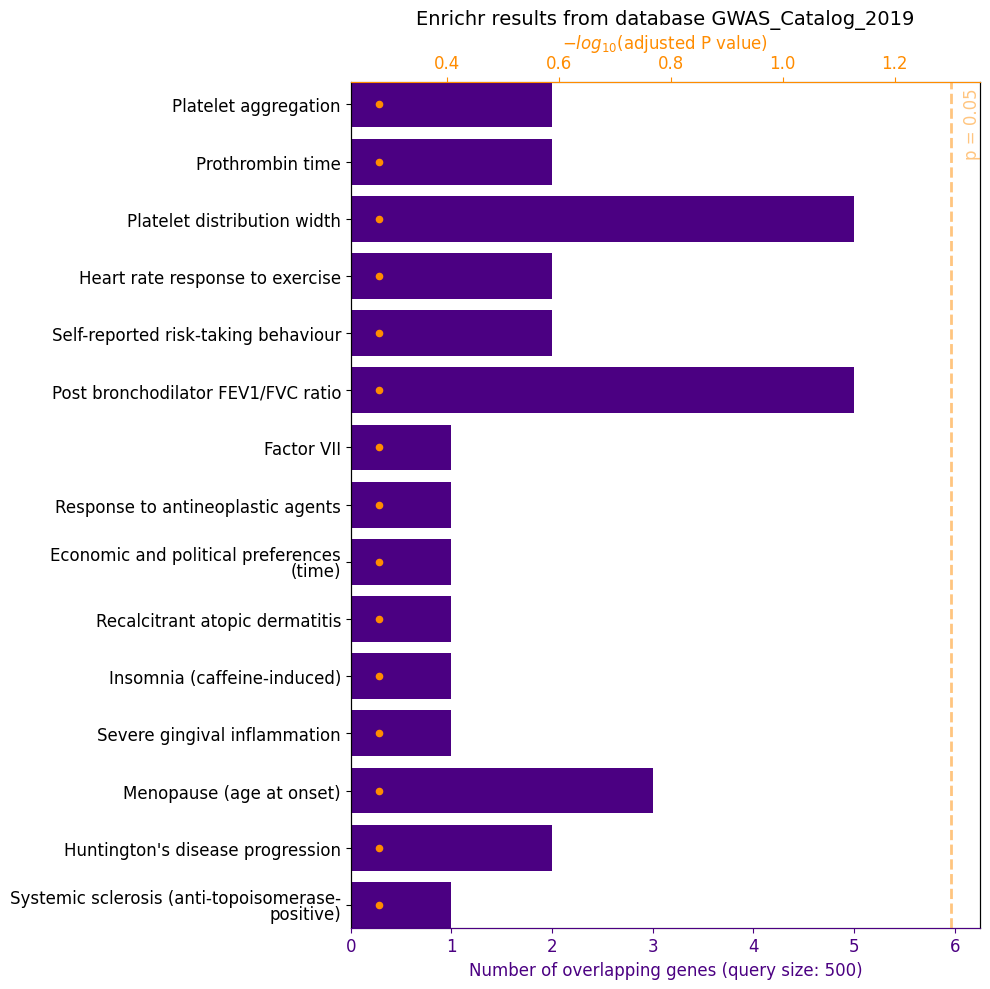

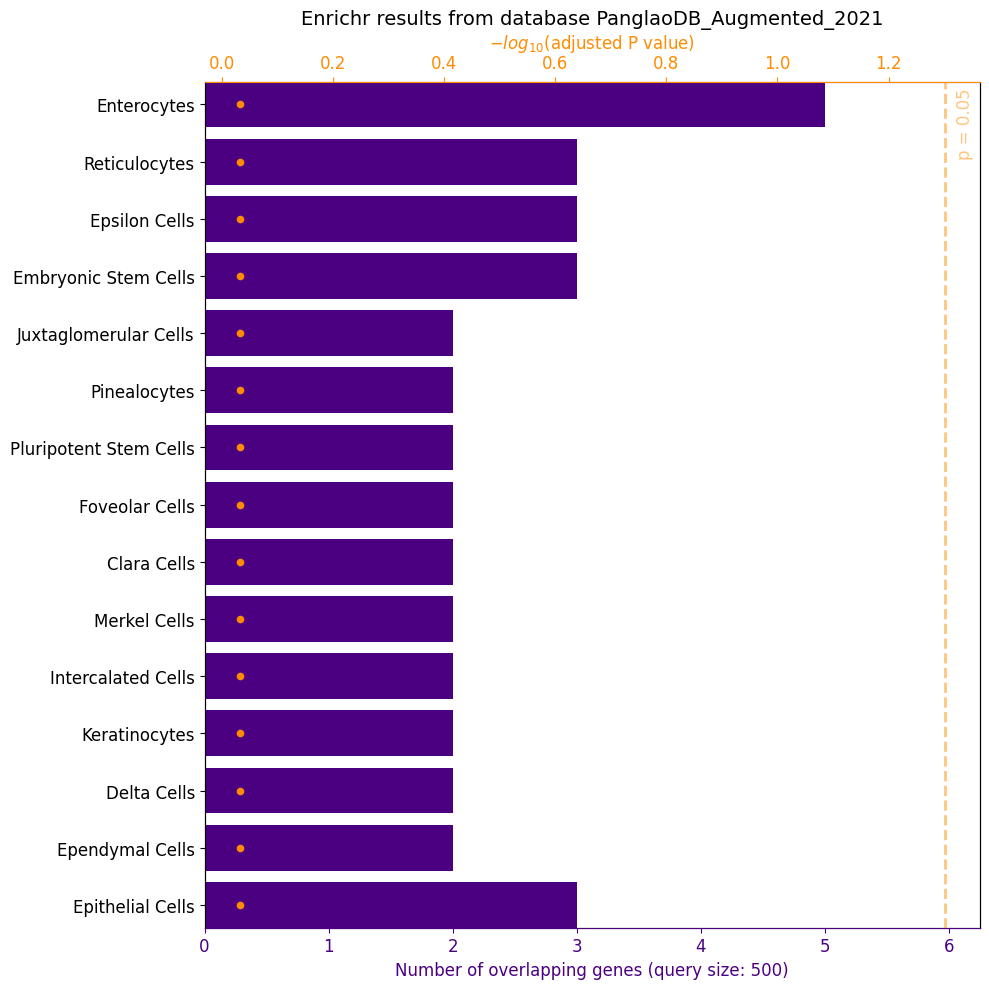

In [11]:
for database in databases:
    if database == "pathway" or database.startswith("KEGG"):
        kegg_out_path = f"{enrichr_output_path}/kegg_{database}.png"
    else:
        kegg_out_path = None
    try:
        gget.enrichr(top_mutant_gene_list, database, background_list = background_gene_list, plot = True, kegg_out = kegg_out_path, save = True)
        destination_path = f"{enrichr_output_path}/{database}.png"
        destination_dir = os.path.dirname(destination_path)
        # os.makedirs(destination_dir, exist_ok=True)
        shutil.move("./gget_enrichr_results.png", destination_path)
        csv_destination_path = destination_path.replace(".png", ".csv")
        shutil.move("./gget_enrichr_results.csv", csv_destination_path)
    except Exception as e:
        print(f"Error with {database}: {e}")
